<a href="https://colab.research.google.com/github/ertgrulyksk/Yahoo-Finance/blob/main/YFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 948 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import yfinance as yf
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt

In [3]:
tl=yf.download("TRY=X","1967-01-01","2022-09-17")

[*********************100%***********************]  1 of 1 completed


In [6]:
tl.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1.3455,1.3455,1.3368,1.344,1.344,0
2005-01-04,1.3368,1.3510,1.3368,1.351,1.351,0
2005-01-05,1.3545,1.3865,1.3545,1.374,1.374,0


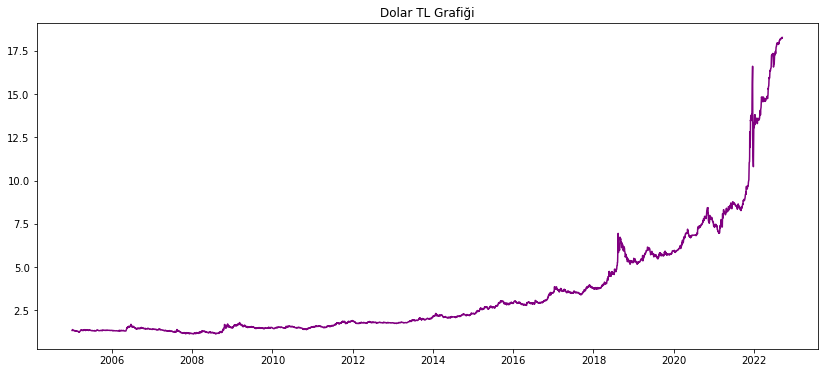

In [12]:
plt.figure(figsize=(14,6))
plt.plot(tl.index,tl['Close'],color="purple")
plt.title("Dolar TL Grafiği")
plt.show()

In [13]:
tl.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1.3455,1.3455,1.3368,1.344,1.344,0
2005-01-04,1.3368,1.3510,1.3368,1.351,1.351,0
2005-01-05,1.3545,1.3865,1.3545,1.374,1.374,0


In [16]:
tl['dun']=tl['Close'].shift(1)

In [17]:
tl.head(3)

,Open,High,Low,Close,Adj Close,Volume,dun
Date,,,,,,,
2005-01-03,1.3455,1.3455,1.3368,1.344,1.344,0,NaN
2005-01-04,1.3368,1.3510,1.3368,1.351,1.351,0,1.344
2005-01-05,1.3545,1.3865,1.3545,1.374,1.374,0,1.351


In [18]:
tl=tl.dropna()
# tl=tl.iloc[1:]

In [19]:
tl.head(3)

,Open,High,Low,Close,Adj Close,Volume,dun
Date,,,,,,,
2005-01-04,1.3368,1.3510,1.3368,1.3510,1.3510,0,1.344
2005-01-05,1.3545,1.3865,1.3545,1.3740,1.3740,0,1.351
2005-01-06,1.3780,1.4058,1.3780,1.3925,1.3925,0,1.374


In [20]:
tl=tl[["Close","dun","Volume"]]

In [21]:
tl.head(3)

,Close,dun,Volume
Date,,,
2005-01-04,1.3510,1.344,0
2005-01-05,1.3740,1.351,0
2005-01-06,1.3925,1.374,0


In [22]:
tl['oran']=(tl['Close']-tl['dun'])/tl['Close']*100

In [23]:
tl.head(3)

,Close,dun,Volume,oran
Date,,,,
2005-01-04,1.3510,1.344,0,0.518132
2005-01-05,1.3740,1.351,0,1.673945
2005-01-06,1.3925,1.374,0,1.328552


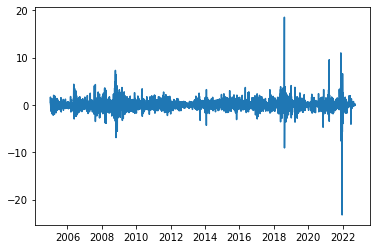

In [25]:
plt.plot(tl.index,tl['oran'])
plt.show()

In [36]:
tlyil=tl.groupby(tl.index.year).mean()
tlyilmax=tl.groupby(tl.index.year).max()

In [28]:
tlyil.head(3)

,Close,dun,Volume,oran
Date,,,,
2005,1.343615,1.343592,0.0,-0.000398
2006,1.431626,1.431395,0.0,0.012164
2007,1.300536,1.301495,0.0,-0.079380


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 287 missing from current font.
  font.set_text(s, 0.0, flags=flags)


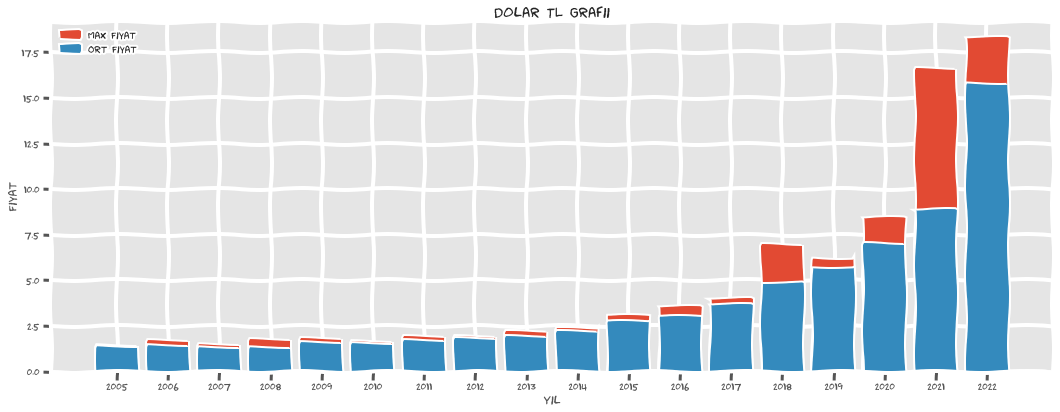

In [43]:
with plt.xkcd():
    plt.figure(figsize=(16,6))
    plt.style.use("ggplot")
    plt.title("Dolar TL Grafiği")
    plt.xlabel("Yil")
    plt.ylabel("Fiyat")
    plt.bar(tlyil.index.astype(str),tlyilmax['Close'],label="Max Fiyat")
    plt.bar (tlyil.index.astype(str),tlyil['Close'],label="Ort Fiyat")
    plt.legend()
    plt.grid(True)
    plt.savefig("grafik.png")
    plt.show()

In [ ]:
plt.style.available

In [44]:
import plotly.express as px

In [47]:
a=px.line(tl,tl.index,tl['Close'])
a.show()

In [49]:
import pandas as pd

In [50]:
world=pd.read_csv("world_population.csv")

In [54]:
world.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [77]:
def ulkebar(country):
    world=pd.read_csv("world_population.csv")
    world=world.set_index("Country")
    nufus=world[world.columns[5:12]].loc[country].values
    yillar=world[world.columns[5:12]].loc[country].index
    yillar=yillar.str.replace("Population","")
    yillar=yillar[::-1] #yılları terse çevirdim
    nufus=nufus[::-1] # nüfusu çevirdim
    plt.bar(yillar,nufus)
    plt.show()

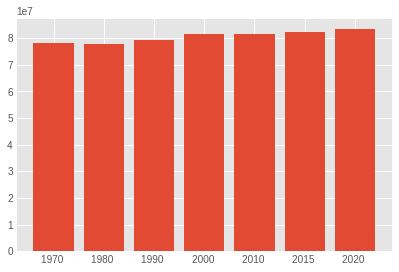

In [78]:
ulkebar("Germany")

In [59]:
# world[world.columns[5:13]].iloc[0].values

array([41128771, 38972230, 33753499, 28189672, 19542982, 10694796,
       12486631, 10752971])

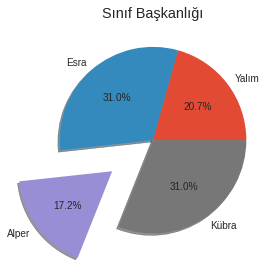

In [83]:
isimler=["Yalım","Esra","Alper","Kübra"]
oylar=[30,45,25,45]
parcala=[0,0,0.55,0]
plt.pie(oylar,labels=isimler,autopct="%1.1f%%",shadow=True,explode=parcala)
plt.title("Sınıf Başkanlığı")
plt.show()

In [84]:
world.head(3)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56


In [85]:
kita=world.groupby("Continent").sum()

In [88]:
kita.head(3)

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Africa,5253,1426730932,1360671810,1201102442,1055228072,818946032,638150629,481536377,365444348,30317963,7127.7158,58.2109,17.87
Asia,3878,4721383274,4663086535,4458250182,4220041327,3735089604,3210563577,2635334228,2144906290,32138141,51251.2068,50.4692,59.19
Europe,6225,743147538,745792196,741535608,735613934,726093423,720320797,692527159,655923991,23010411,33166.2371,50.1128,9.33


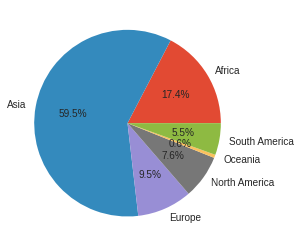

In [92]:
kitalar=kita.index
nufus=kita['2020 Population']
plt.pie(nufus,labels=kitalar,autopct="%1.1f%%")
plt.show()

In [93]:
kita.head(3)

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Africa,5253,1426730932,1360671810,1201102442,1055228072,818946032,638150629,481536377,365444348,30317963,7127.7158,58.2109,17.87
Asia,3878,4721383274,4663086535,4458250182,4220041327,3735089604,3210563577,2635334228,2144906290,32138141,51251.2068,50.4692,59.19
Europe,6225,743147538,745792196,741535608,735613934,726093423,720320797,692527159,655923991,23010411,33166.2371,50.1128,9.33


In [94]:
yillar=[2022,2020,2015,2010,2000,1990,1980,1970]

In [98]:
yillar=[2022,2020,2015,2010,2000,1990,1980,1970]
###
kitanufus=kita[kita.columns[1:9]]
kitanufus.head(6)
###
africa=kitanufus.loc['Africa'].values
asia=kitanufus.loc['Asia'].values
europe=kitanufus.loc['Europe'].values
namerika=kitanufus.loc['North America'].values
okyanusya=kitanufus.loc['Oceania'].values
samerika=kitanufus.loc['South America'].values
###
kitalist=["africa","asia","europe","namerika","okyanusya","samerika"]

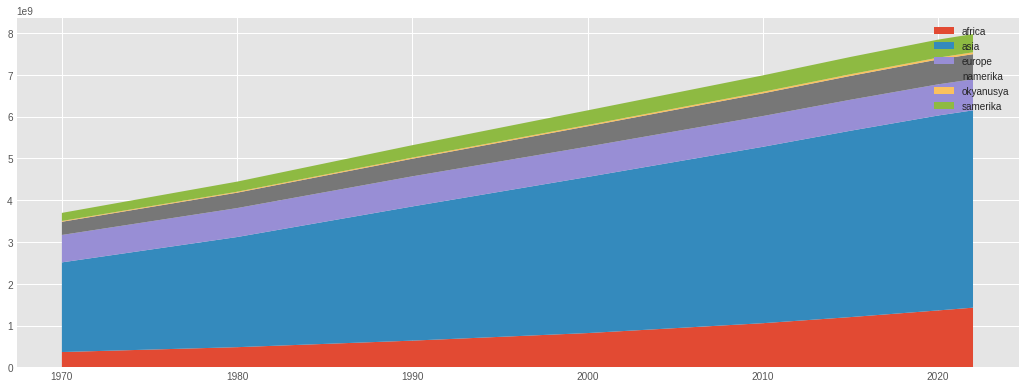

In [104]:
plt.figure(figsize=(16,6))
plt.stackplot(yillar,africa,asia,europe,namerika,okyanusya,samerika,labels=kitalist)
plt.legend()
plt.show()